# Why do e-learners tent to not finish their online courses?

In the era of the internet, resources, especially online courses that are not a consumable in the traditional sense (such as being depleted or exhausted), is rampant. The rise of the new learning techniques and platforms give rise to much lesser paywall and more competitive opportunities for e-learners. However, despite these oppurtunities, many e-learners tend to not be able to finish their online courses. There are a lot of reasons for this, such as:

<ul>
<li>Lack of Time Management</li>
<li> Insufficient Motivation and Engagement</li>
<li>Lack of Incentives and Recognition</li>
<li>Overwhelming Course Load</li>
<li>They are not interested anymore in the course</li>
</ul>
Reference: <a href=https://digitaldefynd.com/IQ/why-people-not-finish-online-courses/> 10 Reasons People Don’t Finish Online Courses </a>

And many more.

# Analyzing A Real Data Set
Here, we will use the kaggle dataset <a href = "https://www.kaggle.com/datasets/vikantkumar/e-learning-student-dataset"> e_learning student dataset </a> to perform some analysis.

In [1]:
#Import libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Load the dataset
df = pd.read_csv('Dataset/e_learning_dataset_with_course_names.csv')
df.head()

,UserID,CourseName,SessionDuration,SessionsPerWeek,CourseCompletion,UserSatisfaction,SignUpDate,LastActiveDate,QuizScores,FeedbackComments
0,user_1,Team-oriented tangible array,47,8,0,3,2023-12-07,2024-04-27,86.093897,Concern near range direction message window.
1,user_2,Proactive demand-driven open system,36,1,0,3,2023-04-02,2024-05-17,52.788174,Card paper able debate.
2,user_3,Re-contextualized encompassing project,71,4,1,3,2023-11-29,2024-03-28,94.891291,Treatment difference thank.
3,user_4,Right-sized object-oriented process improvement,73,4,0,4,2023-07-07,2024-05-18,85.986530,Long its benefit fall from evidence body.
4,user_5,Team-oriented heuristic Graphic Interface,36,1,1,4,2023-06-12,2024-01-16,66.933203,Central stage grow senior.


In [2]:
df.describe()

,SessionDuration,SessionsPerWeek,CourseCompletion,UserSatisfaction,QuizScores
count,2500.00000,2500.000000,2500.0000,2500.000000,2500.000000
mean,63.01000,4.946000,0.4996,2.958800,74.789555
std,33.50123,2.562208,0.5001,1.406661,14.434810
min,5.00000,1.000000,0.0000,1.000000,50.027626
25%,33.00000,3.000000,0.0000,2.000000,61.995844
50%,64.00000,5.000000,0.0000,3.000000,74.479448
75%,92.00000,7.000000,1.0000,4.000000,87.555204
max,119.00000,9.000000,1.0000,5.000000,99.996826


## Cleaning the dataset
Here, we will clean the dataset by checking if there are any null values present in the dataset. Next, we check if there are any duplicate values present in the dataset.

In [3]:
#Checking for null values
df[df.isna().any(axis=1)]

,UserID,CourseName,SessionDuration,SessionsPerWeek,CourseCompletion,UserSatisfaction,SignUpDate,LastActiveDate,QuizScores,FeedbackComments


In [4]:
#Checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UserID            2500 non-null   object 
 1   CourseName        2500 non-null   object 
 2   SessionDuration   2500 non-null   int64  
 3   SessionsPerWeek   2500 non-null   int64  
 4   CourseCompletion  2500 non-null   int64  
 5   UserSatisfaction  2500 non-null   int64  
 6   SignUpDate        2500 non-null   object 
 7   LastActiveDate    2500 non-null   object 
 8   QuizScores        2500 non-null   float64
 9   FeedbackComments  2500 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 195.4+ KB


### Does more sessions per week lead to students not finishing the course?


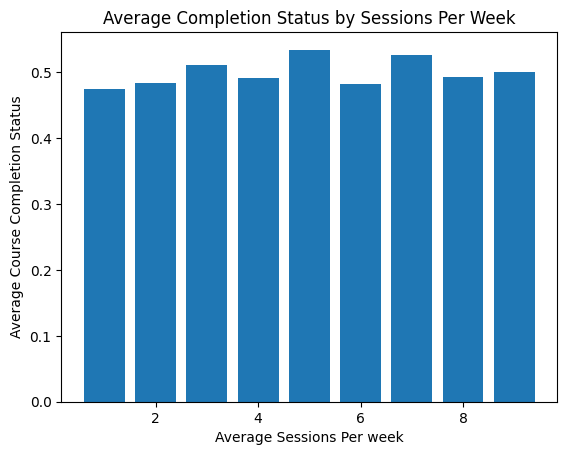

In [7]:
# Group by 'Sessionsperweek' and calculate the mean
grouped_df = df[["CourseCompletion", "SessionsPerWeek"]].groupby("SessionsPerWeek").mean()

# Plot the bar plot
# Plot the bar plot with specified colors=
plt.bar(data = grouped_df, x = grouped_df.index, height = grouped_df["CourseCompletion"])

# Manually create custom legend

# Set labels and title for better readability
plt.xlabel("Average Sessions Per week")
plt.ylabel("Average Course Completion Status")
plt.title("Average Completion Status by Sessions Per Week")

# Show the plot
plt.show()

As we can see, the average completion status by Sessions Per Week fall around 0.5 (half completed, half not completed) for each number of sessions per week. This means that more sessions per week does not lead to students not finishing the course, at least for this given data set.

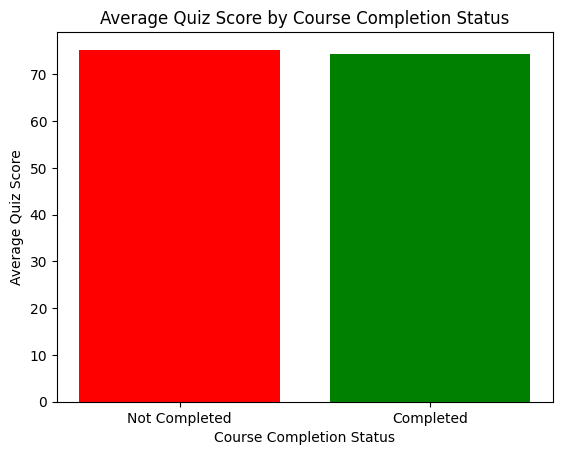

In [8]:
grouped_df = df[["CourseCompletion", "QuizScores"]].groupby("CourseCompletion").mean().rename(index = {0:"Not Completed", 1:"Completed"})
# Plot the bar plot
# Plot the bar plot with specified colors=
plt.bar(data = grouped_df, x = grouped_df.index, height = grouped_df["QuizScores"], color = ["red", "green"])

# Manually create custom legend

# Set labels and title for better readability
plt.xlabel("Course Completion Status")
plt.ylabel("Average Quiz Score")
plt.title("Average Quiz Score by Course Completion Status")

# Show the plot
plt.show()

## Does Quiz Score affect Course Completion Status?
As we can see from the bar graph, we can see that the average quiz score for those who accomplished the course and those who did not complete the course are very similar. This means that the quiz score does not give a huge impact in analyzing the course completion status. Even the Average Quiz Score for those who did not complete the course is much higher than those who completed the course.

## User Satisfaction Analysis

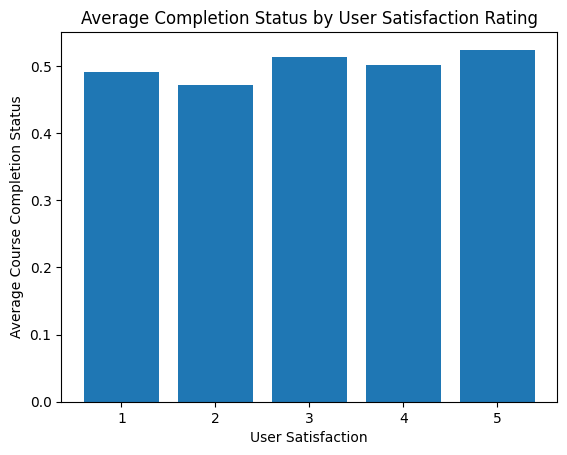

In [9]:
# Group by 'Sessionsperweek' and calculate the mean
grouped_df = df[["CourseCompletion", "UserSatisfaction"]].groupby("UserSatisfaction").mean()

# Plot the bar plot
# Plot the bar plot with specified colors=
plt.bar(data = grouped_df, x = grouped_df.index, height = grouped_df["CourseCompletion"])

# Manually create custom legend

# Set labels and title for better readability
plt.xlabel("User Satisfaction")
plt.ylabel("Average Course Completion Status")
plt.title("Average Completion Status by User Satisfaction Rating")

# Show the plot
plt.show()

## Using Natural Language Processing (NLP) 

Here, we'll use feedback comments and process it using Natural Language Processing (NLP) to determine if the comments are positive or negative for the course. We then check if the negative comments have a corresponding no completion for the course.


In [10]:
from textblob import TextBlob

def get_sentiment(message):
    analysis = TextBlob(message)
    if analysis.sentiment.polarity > 0:
        return 'good'
    elif analysis.sentiment.polarity < 0:
        return 'bad'
    else:
        return 'neutral'


In [11]:
df["sentiment"] = df["FeedbackComments"].apply(get_sentiment)

In [12]:
df

,UserID,CourseName,SessionDuration,SessionsPerWeek,CourseCompletion,UserSatisfaction,SignUpDate,LastActiveDate,QuizScores,FeedbackComments,sentiment
0,user_1,Team-oriented tangible array,47,8,0,3,2023-12-07,2024-04-27,86.093897,Concern near range direction message window.,good
1,user_2,Proactive demand-driven open system,36,1,0,3,2023-04-02,2024-05-17,52.788174,Card paper able debate.,good
2,user_3,Re-contextualized encompassing project,71,4,1,3,2023-11-29,2024-03-28,94.891291,Treatment difference thank.,neutral
3,user_4,Right-sized object-oriented process improvement,73,4,0,4,2023-07-07,2024-05-18,85.986530,Long its benefit fall from evidence body.,bad
4,user_5,Team-oriented heuristic Graphic Interface,36,1,1,4,2023-06-12,2024-01-16,66.933203,Central stage grow senior.,neutral
...,...,...,...,...,...,...,...,...,...,...,...
2495,user_2496,Expanded zero administration structure,8,6,1,1,2023-01-19,2024-02-07,54.867287,However fish walk vote simple.,neutral
2496,user_2497,Adaptive system-worthy paradigm,112,8,0,3,2023-10-19,2024-04-07,57.526502,Beat imagine middle store.,neutral
2497,user_2498,Profound static encryption,63,8,1,4,2023-07-29,2024-06-03,54.156863,Spring soon occur candidate writer hope.,neutral
2498,user_2499,Re-contextualized encompassing project,55,9,1,1,2023-07-08,2024-03-25,94.725978,Guy million magazine face.,neutral


In [13]:
good_completed_ratio = df[(df["sentiment"] == "good") & (df["CourseCompletion"] == 1)]["CourseCompletion"].count() / df[df["sentiment"] == "good"]["CourseCompletion"].count()

print("Good to Completed Ratio:", good_completed_ratio)

bad_completed_ratio = df[(df["sentiment"] == "bad") & (df["CourseCompletion"] == 1)]["CourseCompletion"].count() / df[df["sentiment"] == "bad"]["CourseCompletion"].count()
print("Bad to Completed Ratio:", bad_completed_ratio)

neutral_completed_ratio = df[(df["sentiment"] == "neutral") & (df["CourseCompletion"] == 1)]["CourseCompletion"].count() / df[df["sentiment"] == "neutral"]["CourseCompletion"].count()

print("Neutral to Completed Ratio:", neutral_completed_ratio)

Good to Completed Ratio: 0.5239234449760766
Bad to Completed Ratio: 0.4868421052631579
Neutral to Completed Ratio: 0.48753894080996885


In [14]:
import statsmodels.api as sm

In [15]:
X = sm.add_constant(df[['SessionDuration', 'SessionsPerWeek', 'QuizScores']])
y = df['CourseCompletion']

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.692469
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:       CourseCompletion   No. Observations:                 2500
Model:                          Logit   Df Residuals:                     2496
Method:                           MLE   Df Model:                            3
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:               0.0009781
Time:                        21:22:12   Log-Likelihood:                -1731.2
converged:                       True   LL-Null:                       -1732.9
Covariance Type:            nonrobust   LLR p-value:                    0.3353
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2422      0.240      1.010      0.312      -0.228       0.712
SessionDuratio

#### Interpretation of Coefficients:

**Intercept (const)**: The intercept is -0.0970. In logistic regression, this represents the log-odds of the completion status when all predictor variables are zero (sessions per week and session duration in this case).
**SessionDuration**: The coefficient is 0.0007, with a standard error of 0.001. This suggests that for a one-unit increase in average session duration, the log-odds of completing the course increase by 0.0007. However, the p-value (0.559) indicates that this coefficient is not statistically significant at the typical significance level of 0.05.
**SessionsPerWeek**: The coefficient is 0.0104, with a standard error of 0.016. This indicates that for a one-unit increase in sessions per week, the log-odds of completing the course increase by 0.0104. Similar to SessionDuration, the p-value (0.505) suggests that this coefficient is also not statistically significant.

#### Model Fit:

**Pseudo R-squared**: The Pseudo R-squared value is 0.0002312, which is very low. This indicates that the model does not explain much of the variability in the completion status based on the variables included.

**Likelihood Ratio Test (LLR) p-value**: The LLR p-value (0.6699) is high, indicating that the model as a whole is not statistically significant compared to a model with no predictors.

#### Conclusion:

Based on these results:

There is no statistically significant evidence that either SessionDuration or SessionsPerWeek significantly influences the completion status of the course in the logistic regression model.
The model itself does not provide a good fit for explaining the variability in completion status based on these variables.